# Accessing and Displaying LISIRD with LaTiS
This notebook will demonstrate how to access and display datasets from the [LASP Interactive Solar Irradiance Data Center (LISIRD)](https://lasp.colorado.edu/lisird) using LaTiS with Python.

The "About LaTiS" section describes the LaTiS service interface. 

The "Using LaTiS with Python" section shows how to interact with LaTiS through Python code.

## About LaTiS

### Overview
LaTiS is an [API](https://en.wikipedia.org/wiki/Application_programming_interface) that allows software programs to access datasets from a variety of projects. We discuss [LISIRD](https://lasp.colorado.edu/lisird/) here, but there are LaTiS servers deployed for many other projects (e.g., the [Space Weather Data Portal](https://lasp.colorado.edu/space-weather-portal)). LaTiS implements a [Functional Data Model](https://github.com/latis-data/latis/blob/master/README.md) that provides customizable data access with a query language that expresses its "functional algebra." Clients can query LaTiS with URLs that:

 - select a dataset
 - specify the desired variables
 - specify the desired subset
 - pass the result through a number of other operations
 - specify an output format

### LaTiS usage
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><b style="font-family: 'Courier New', monospace; color: blue;">baseURL</b>/<b style="font-family: 'Courier New', monospace; color: blue;">dataset</b>.<b style="font-family: 'Courier New', monospace; color: blue;">suffix</b>?<b style="font-family: 'Courier New', monospace; color: blue;">projection</b>&amp;<b style="font-family: 'Courier New', monospace; color: blue;">selection</b>&amp;<b style="font-family: 'Courier New', monospace; color: blue;">operation</b></pre>

<br>

#### _baseURL_: 
The URL to the LaTiS server. For the LISIRD, it is: https://lasp.colorado.edu/lisird/latis/dap/. Other projects have their own unique base URLs.

#### _dataset_
The dataset to request (see <a href="#datasets">Available datasets</a>).

#### _suffix_
Type of output (see <a href="#suffix">Output options</a>).

#### _projection_
Comma-separated list of variables to return. Default to all.
The Dataset Descriptor Structure (DDS) will describe the variables for each dataset. Use the _.dds_ suffix to get a dataset's DDS.

#### _selection_
Zero or more relative constraints on a variable (e.g. `&time<=2010-01-01T12:00` or `&irradiance>1360`). Each must be separated by an '&'.

#### _operation_
Zero or more other operations to be applied to the data (see <a href="#operation">Operation options</a>). Each must be separated by an '&'.

LaTiS URLs are also useful for accessing data from the command line (see <a href="#wget-and-curl">Using LaTiS with wget and curl</a>). 

### Example LaTiS URLs
Below are example LaTiS URLs that follow the syntax described above. Note that LaTiS queries begin after `/latis/dap/` in the URL. Also note that all time variables are simply named `time` and follow the [ISO 8601 date format](https://en.wikipedia.org/wiki/ISO_8601). Projections, selections, and other operations begin after `?` in the URL and are all separated by ampersands (&).

**First 10 spectra before 2001 from UARS, in CSV format:**
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><a href="https://lasp.colorado.edu/lisird/latis/dap/uars_solstice_ssi.csv?time,wavelength,irradiance&time&lt;2001&limit(10)">https://lasp.colorado.edu/lisird/latis/dap/uars_solstice_ssi.csv?time,wavelength,irradiance&time&lt;2001&limit(10)</a></pre>

<br>

**SORCE TSI data for one year:**
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><a href="https://lasp.colorado.edu/lisird/latis/dap/sorce_tsi_24hr_l3.asc?time&gt;=2005-05-05T12:00&time&lt;2006-05-05T12:00">https://lasp.colorado.edu/lisird/latis/dap/sorce_tsi_24hr_l3.asc?time&gt;=2005-05-05T12:00&time&lt;2006-05-05T12:00</a></pre>

<br>

**Dataset Descriptor Structure for Historical TSI:**
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><a href="https://lasp.colorado.edu/lisird/latis/dap/historical_tsi.dds">https://lasp.colorado.edu/lisird/latis/dap/historical_tsi.dds</a></pre>

<br>

**Last MAVEN EUV L2 Bands data point in JSON format, replacing missing values with "42.0" and renaming the "time" variable to "wow":**
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;"><a href="https://lasp.colorado.edu/lisird/latis/dap/mvn_euv_l2_bands.json?last()&replace_missing(42.0)&rename(time,wow)">https://lasp.colorado.edu/lisird/latis/dap/mvn_euv_l2_bands.json?last()&replace_missing(42.0)&rename(time,wow)</a></pre>

### Available datasets<a class="anchor" id="datasets"></a>

<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;">https://lasp.colorado.edu/lisird/latis/dap/<b style="font-family: 'Courier New', monospace; color: blue;">dataset</b>.suffix?projection&selection&operation</pre>

<br>

Navigate to LISIRD's [LaTiS landing page](https://lasp.colorado.edu/lisird/latis/dap/) to view the available datasets served by LaTiS. To access a dataset, substitute in its name exactly as written for the `dataset` portion of a query URL.

### Output options (_suffix_)<a class="anchor" id="suffix"></a>


<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;">https://lasp.colorado.edu/lisird/latis/dap/dataset.<b style="font-family: 'Courier New', monospace; color: blue;">suffix</b>?projection&selection&operation</pre>

<br>

#### _.asc_
ASCII representation reflecting how the dataset is modeled

#### _.bin_
Binary stream in network byte order (big-endian)

#### _.csv_
Comma delimited ASCII with simple header

#### _.das_
DAP2 standard Dataset Attribute Structure with metadata only

#### _.dds_
DAP2 standard Dataset Descriptor Structure with structure metadata only

#### _.dods_
DAP2 standard data output

#### _.html_
HTML landing page for a dataset

#### _.json_
JSON with labels

#### _.jsona_
JSON as arrays

#### _.jsond_
JSON with metadata and arrays of data

#### _.nc_
NetCDF file

#### _.tab_
Tab delimited ASCII with no header

#### _.txt_
Comma delimited ASCII with no header

#### _.zip_
Zip file, available only for file list datasets


### Operation options<a class="anchor" id="operation"></a>

<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;">https://lasp.colorado.edu/lisird/latis/dap/dataset.suffix?projection&selection&<b style="font-family: 'Courier New', monospace; color: blue;">operation</b></pre>

<br>

Below are the operations from LaTiS's query language available to LISIRD datasets. **Please note that this query language is distinct from a finite set of key parameters. Not all combinations of operations will be valid, and some operations only work on certain types of data.**

<br>

#### Time conversions

##### _convertTime_
Convert time values to the given units

_Usage:_ `&convertTime(time,units)`, where units is duration units since an epoch (e.g. "milliseconds since 1970-01-01"). Note that the first argument should almost always be the word `time` since all LaTiS time variable names have the alias "time".

##### _convertTimeTupleToTime_
Transform Tuples of date-time components into Time scalars

_Usage:_ `&convertTimeTupleToTime()`

##### _formatTime_
Convert time values to the given format (for text output) as specified by [Java's SimpleDateFormat](https://docs.oracle.com/javase/8/docs/api/java/text/SimpleDateFormat.html)

_Usage:_ `&formatTime(format)`, e.g. `formatTime(yyyy-MM-dd'T'HH:mm:ss.SSS)`

<br>

#### Filters

##### _contains_
Return samples where the given variable has one of the given values

_Usage:_ `&contains(name, v1, v2, ...)`

##### _drop_
Return all but the first n samples

_Usage:_ `&drop(n)`

##### _excludeMissing_
Exclude all samples that contain a missing value

_Usage:_ `&excludeMissing()`

##### _first_
Return the first sample

_Usage:_ `&first()`

##### _last_
Return the last sample

_Usage:_ `&last()`

##### _max_
Return the samples that have the maximum value for a given variable

_Usage:_ `&max(name)`

##### _maxDelta_
Filter out samples where the change between samples for a given variable exceeds a given value

_Usage:_ `&maxDelta(name,value)`

##### _min_
Return the samples that have the minimum value for a given variable

_Usage:_ `&min(name)`

##### _project_
Return only the given variables, does not change order (redundant if projections were already specified in the query URL)

_Usage:_ `&project(v1,v2,...)`

##### _select_
Filter samples given a predicate (e.g. time>0). This operation is usually not used since most predicates (e.g. time selections) can be specified directly in the query URL.

_Usage:_ `&select(predicate)`, e.g. `select(time<2000-01-01)`

##### _stride_
Return every nth sample

_Usage:_ `&stride(n)`

##### _take_
Return the first n samples

_Usage:_ `&take(n)`

##### _takeRight_
Return the lattermost n samples

_Usage:_ `&takeRight(n)`

<br>

#### Miscellaneous

##### _appendText_
Append the given text to the value of the given text variable

_Usage:_ `&appendText(variable,text)`

##### _binAverageByWidth_
Bin the samples by a given width, with optional start value, in the units of the domain variable and compute the mean, min, max, and count of the range values in each bin

_Usage:_ `&binAverageByWidth(width, start)`

##### _derive_
Derive a new variable in terms of other variables

_Usage:_ `&derive(expression)`, e.g. `derive(a/b+1)`

##### _domBin_
Add bin semantics to the domain variable by adding min and max variables to the range to specify the coverage of each bin

_Usage:_ `&domBin(start|end,fill)`

##### _integrate_
Integrate a nested function over an optional range of domain values

_Usage:_ `&integrate(v1,v2)`

##### _pivot_
Transform a range of a single variable into a tuple where each element corresponds to one of n values of the given domain variable

_Usage:_ `&pivot(name, n)`

##### _rename_
Change the name of a given variable

_Usage:_ `&rename(old,new)`

##### _replaceMissing_
Replace any missing value with the given value

_Usage:_ `&replaceMissing(value)`

##### _replaceValue_
Replace every occurrence of a given value with another given value

_Usage:_ `&replaceValue(v1,v2)`

##### _roundWithPrecision_
Round values of the given variable to the given number of decimal places

_Usage:_ `&roundWithPrecision(name, value)`

##### _roundWithSigfigs_
Round values of the given variable to the given number of significant figures

_Usage:_ `&roundWithSigfigs(name, value)`

##### _total_
Sum the range values of all the samples into a single sample, using the last domain value

_Usage:_ `&total()`

## Using LaTiS with Python

First, our imports. We will use:
 - `pandas` to directly access LaTiS datasets
 - `requests` to download LaTiS dataset files
 - `matplotlib` to plot datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

### Accessing data
As we saw above, the structure of a LaTiS query is:
<pre style="background: rgba(0,0,0,.1); padding: .75em 1em; max-width: 100%; overflow-x: auto;">https://lasp.colorado.edu/lisird/latis/dap/<b style="font-family: 'Courier New', monospace; color: blue;">dataset</b>.<b style="font-family: 'Courier New', monospace; color: blue;">suffix</b>?<b style="font-family: 'Courier New', monospace; color: blue;">projection</b>&amp;<b style="font-family: 'Courier New', monospace; color: blue;">selection</b>&amp;<b style="font-family: 'Courier New', monospace; color: blue;">operation</b></pre>

<br>

We can retrieve data from any valid LaTiS query URL. In Python, a couple good options are to:

1. Read the dataset directly into a pandas DataFrame
2. Download the data into a temporary file, then work with the file

**Option #1 will generally be the better option** in Python since pandas is the standard library for data processing ([see their documentation](https://pandas.pydata.org/docs/)). We'll show both options but start with pandas.

We can write LaTiS query URLs by hand, or, since their structure is fixed, we may want to use a helper method like the following to make them easier to generate:



In [2]:
def latis_query_url(dataset, suffix="csv", projections=[], min_time="", max_time="", operations=[]):
    """Generates a LaTiS LISIRD query URL with the given components."""
    base = "https://lasp.colorado.edu/lisird/latis/dap/"
    query = base + dataset + "." + suffix + "?"
    if projections:
        query += ",".join(projections)
    if min_time:
        query += "&time>=" + min_time  # note: could use "time>"
    if max_time:
        query += "&time<" + max_time   # note: could use "time<="
    if operations:
        query += "&" + "&".join(operations)
    return query

#### Accessing with `pandas`

We can get a pandas DataFrame containing our dataset with pandas's [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method. Note that we'll use the "csv" suffix in the LaTiS query. 

(Also note that pandas can read [more formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) than CSV, but CSV is the most straightforward and performant.)

In [3]:
query = "https://lasp.colorado.edu/lisird/latis/dap/sorce_tsi_24hr_l3.csv?time,tsi_1au&time>2005&limit(10)"
data = pd.read_csv(query, parse_dates=[0], index_col=[0]) 
print(data)

                    tsi_1au (W/m^2)
time (Julian Date)                 
2453372.0                 1361.1150
2453373.0                 1361.0300
2453374.0                 1360.9701
2453375.0                 1360.9728
2453376.0                 1360.9647
2453377.0                 1360.9675
2453378.0                 1360.9684
2453379.0                 1360.9920
2453380.0                 1360.9626
2453381.0                 1360.9083


#### Accessing with `requests`

We can use Python's built-in `requests` library to store LaTiS datasets as files. The `requests.get()` call returns a [response object](https://docs.python-requests.org/en/latest/user/quickstart/#response-content), where the file contents are stored in a `.content` object. The following code accesses the same data we just saw but saves it in a JSON arrays (.jsona) file:

In [4]:
# Same query as above except with "jsona" suffix
query = latis_query_url("sorce_tsi_24hr_l3", "jsona", projections=["time", "tsi_1au"], min_time="2005", operations=["limit(10)"])
res = requests.get(query)
open('sorce.json', 'wb').write(res.content)  # Note, saves in the current working directory

267

The `requests` approach is useful when our analysis requires working with files in specific formats, as the LaTiS service interface can output data in a variety of formats (see <a href="#suffix">Output options</a> above). If we end up needing to manipulate the data after it's been downloaded, we can always load it back into a DataFrame:

In [5]:
data = pd.read_json('sorce.json')
data.columns = ["time (Julian Date)", "tsi_1au (W/m^2)"]
data.set_index("time (Julian Date)", inplace=True)
print(data)

                    tsi_1au (W/m^2)
time (Julian Date)                 
1104580800000             1361.1150
1104667200000             1361.0300
1104753600000             1360.9701
1104840000000             1360.9728
1104926400000             1360.9647
1105012800000             1360.9675
1105099200000             1360.9684
1105185600000             1360.9920
1105272000000             1360.9626
1105358400000             1360.9083


### Manipulating data

We have a variety of options for manipulating our data. We can:

- Apply server-side LaTiS <a href="#operation">operations</a> to the data
- [Manipulate](https://pandas.pydata.org/docs/user_guide/indexing.html) the pandas DataFrame
- Manipulate lists extracted from the DataFrame

Let's look at ways to do the following three tasks, using each of the different manipulation methods mentioned above:
 1. Get all the values of a single variable
 2. Get the first row of a dataset
 3. Get the last five rows of a dataset

#### 1) Three ways to: Get all the values of the "Irradiance" variable

In [6]:
# Applying LaTiS operation (projection)
query1 = latis_query_url("historical_tsi", "csv", projections=["Irradiance"])
data = pd.read_csv(query1) 
data  # pandas DataFrame

,Irradiance (W/m^2)
0,1360.1856
1,1360.4700
2,1360.6798
3,1360.9569
4,1361.0877
...,...
404,1361.5882
405,1361.7017
406,1361.3384
407,1361.2147


In [7]:
# Slicing the DataFrame
query2 = latis_query_url("historical_tsi", "csv")
df = pd.read_csv(query2) 
data = df["Irradiance (W/m^2)"]
data  # pandas Series

0      1360.1856
1      1360.4700
2      1360.6798
3      1360.9569
4      1361.0877
         ...    
404    1361.5882
405    1361.7017
406    1361.3384
407    1361.2147
408    1361.2560
Name: Irradiance (W/m^2), Length: 409, dtype: float64

In [8]:
# Slicing lists extracted from the DataFrame
query3 = latis_query_url("historical_tsi", "csv")
df = pd.read_csv(query3, index_col=[0])
lists = df.values.tolist()
data = [row[0] for row in lists]
data  # List

[1360.1856,
 1360.47,
 1360.6798,
 1360.9569,
 1361.0877,
 1361.0211,
 1360.6735,
 1360.3792,
 1360.2902,
 1360.3277,
 1360.3773,
 1360.3788,
 1360.3783,
 1360.3801,
 1360.3495,
 1360.4456,
 1360.5186,
 1360.4285,
 1360.4122,
 1360.4273,
 1360.3466,
 1360.2914,
 1360.2837,
 1360.3203,
 1360.3345,
 1360.3001,
 1360.2879,
 1360.2465,
 1360.4751,
 1360.7861,
 1360.6269,
 1360.3285,
 1360.4316,
 1360.5082,
 1360.3885,
 1360.3211,
 1360.275,
 1360.2722,
 1360.2714,
 1360.2709,
 1360.2706,
 1360.275,
 1360.2905,
 1360.4116,
 1360.3536,
 1360.2788,
 1360.275,
 1360.2743,
 1360.274,
 1360.274,
 1360.2931,
 1360.3974,
 1360.2837,
 1360.2744,
 1360.274,
 1360.274,
 1360.274,
 1360.274,
 1360.274,
 1360.274,
 1360.274,
 1360.2872,
 1360.3714,
 1360.2827,
 1360.2741,
 1360.274,
 1360.2949,
 1360.5218,
 1360.4161,
 1360.2832,
 1360.288,
 1360.3207,
 1360.3106,
 1360.2775,
 1360.2742,
 1360.274,
 1360.274,
 1360.274,
 1360.2877,
 1360.3253,
 1360.277,
 1360.274,
 1360.2748,
 1360.2833,
 1360.3016,
 

#### 2) Three ways to: Get the first row of the dataset

In [9]:
# Applying LaTiS operation (first)
query1 = latis_query_url("historical_tsi", "csv", operations=["first()"])
data = pd.read_csv(query1) 
data  # pandas DataFrame

,time (yyyy),Irradiance (W/m^2)
0,1610,1360.1856


In [10]:
# Slicing the DataFrame
query2 = latis_query_url("historical_tsi", "csv")
df = pd.read_csv(query2) 
data = df.head(1)
data  # pandas DataFrame

,time (yyyy),Irradiance (W/m^2)
0,1610,1360.1856


In [11]:
# Slicing lists extracted from the DataFrame
query3 = latis_query_url("historical_tsi", "csv")
df = pd.read_csv(query3)
lists = df.values.tolist()
data = lists[0]
print(data)  # List

[1610.0, 1360.1856]


#### 3) Three ways to: Get the last five rows of the dataset

In [12]:
# Applying LaTiS operation (takeRight(5))
query1 = latis_query_url("historical_tsi", "csv", operations=["takeRight(5)"])
data = pd.read_csv(query1) 
data  # pandas DataFrame

,time (yyyy),Irradiance (W/m^2)
0,2014,1361.5882
1,2015,1361.7017
2,2016,1361.3384
3,2017,1361.2147
4,2018,1361.2560


In [13]:
# Slicing the DataFrame
query2 = latis_query_url("historical_tsi", "csv")
df = pd.read_csv(query2, index_col=[0]) 
data = df.iloc[-5:]
data  # pandas DataFrame

,Irradiance (W/m^2)
time (yyyy),
2014,1361.5882
2015,1361.7017
2016,1361.3384
2017,1361.2147
2018,1361.2560


In [14]:
# Slicing lists extracted from the DataFrame
query3 = latis_query_url("historical_tsi", "csv")
df = pd.read_csv(query3)
lists = df.values.tolist()
data = lists[-5:]
print(data)  # List of Lists

[[2014.0, 1361.5882], [2015.0, 1361.7017], [2016.0, 1361.3384], [2017.0, 1361.2147], [2018.0, 1361.256]]


Those were all examples of subsetting a dataset. **Notice how the LaTiS operation was the simplest option in each example.** Furthermore, notice that **we save network bandwidth using LaTiS operations because they are applied server-side** before the download occurs. The other methods require downloading more data than we end up keeping. The LaTiS service interface offers a variety of operations that go far beyond selecting subsets of data (see <a href="#operation">Operation options</a> above). Let's look at a few examples:

#### Other LaTiS operations

##### Format times as ISO 8601 strings (yyyy-MM-dd'T'HH:mm:ss.SSS)

In [15]:
query = latis_query_url("sorce_tsi_24hr_l3", min_time="2010-01-01", max_time="2010-01-04", operations=["formatTime(yyyy-MM-dd'T'HH:mm:ss.SSS)"])
data = pd.read_csv(query, index_col=[0]) 
data

,tsi_1au (W/m^2),instrument_accuracy_1au (W/m^2),instrument_precision_1au (W/m^2),solar_standard_deviation_1au (W/m^2),measurement_uncertainty_1au (W/m^2),tsi_true_earth (W/m^2),instrument_accuracy_true_earth (W/m^2),instrument_precision_true_earth (W/m^2),solar_standard_deviation_true_earth (W/m^2),measurement_uncertainty_true_earth (W/m^2),avg_measurement_date (Julian Date),std_dev_measurement_date (days)
time (yyyy-MM-dd'T'HH:mm:ss.SSS),,,,,,,,,,,,
2010-01-01T12:00:00.000,1360.4922,0.4853,0.0068,0.05171,0.4880,1407.1044,0.5019,0.0068,0.05744,0.5052,2.455198e+06,0.3111
2010-01-02T12:00:00.000,1360.5265,0.4853,0.0068,0.05866,0.4888,1407.1589,0.5019,0.0068,0.06248,0.5058,2.455199e+06,0.2992
2010-01-03T12:00:00.000,1360.5987,0.4853,0.0068,0.05061,0.4880,1407.2331,0.5020,0.0068,0.05177,0.5046,2.455200e+06,0.3062


##### Format times as Unix timestamps (seconds since 1970-01-01)

In [16]:
query = latis_query_url("sorce_tsi_24hr_l3", min_time="2010-01-01T00:00:00.000", max_time="2010-01-04T00:00:00.000", operations=["convertTime(time,seconds since 1970-01-01)".replace(" ","%20")])  # spaces encoded to %20
data = pd.read_csv(query, index_col=[0]) 
data

,tsi_1au (W/m^2),instrument_accuracy_1au (W/m^2),instrument_precision_1au (W/m^2),solar_standard_deviation_1au (W/m^2),measurement_uncertainty_1au (W/m^2),tsi_true_earth (W/m^2),instrument_accuracy_true_earth (W/m^2),instrument_precision_true_earth (W/m^2),solar_standard_deviation_true_earth (W/m^2),measurement_uncertainty_true_earth (W/m^2),avg_measurement_date (Julian Date),std_dev_measurement_date (days)
time (seconds since 1970-01-01),,,,,,,,,,,,
1.262347e+09,1360.4922,0.4853,0.0068,0.05171,0.4880,1407.1044,0.5019,0.0068,0.05744,0.5052,2.455198e+06,0.3111
1.262434e+09,1360.5265,0.4853,0.0068,0.05866,0.4888,1407.1589,0.5019,0.0068,0.06248,0.5058,2.455199e+06,0.2992
1.262520e+09,1360.5987,0.4853,0.0068,0.05061,0.4880,1407.2331,0.5020,0.0068,0.05177,0.5046,2.455200e+06,0.3062


##### Fill missing values with -99999 (and limit to the first three rows)

In [17]:
query = latis_query_url("sorce_tsi_24hr_l3", operations=["replaceMissing(-99999)", "limit(5)"])
data = pd.read_csv(query, parse_dates=[0], index_col=[0]) 
data

,tsi_1au (W/m^2),instrument_accuracy_1au (W/m^2),instrument_precision_1au (W/m^2),solar_standard_deviation_1au (W/m^2),measurement_uncertainty_1au (W/m^2),tsi_true_earth (W/m^2),instrument_accuracy_true_earth (W/m^2),instrument_precision_true_earth (W/m^2),solar_standard_deviation_true_earth (W/m^2),measurement_uncertainty_true_earth (W/m^2),avg_measurement_date (Julian Date),std_dev_measurement_date (days)
time (Julian Date),,,,,,,,,,,,
2452696.0,1361.4851,0.4765,0.0068,0.03297,0.4777,1389.1951,0.4862,0.0068,0.03385,0.4874,2.452696e+06,0.0029
2452697.0,-99999.0000,-99999.0000,-99999.0000,-99999.00000,-99999.0000,-99999.0000,-99999.0000,-99999.0000,-99999.00000,-99999.0000,2.452697e+06,-99999.0000
2452698.0,1361.4526,0.4765,0.0068,0.05238,0.4794,1388.0864,0.4858,0.0068,0.09313,0.4947,2.452698e+06,0.0769
2452699.0,-99999.0000,-99999.0000,-99999.0000,-99999.00000,-99999.0000,-99999.0000,-99999.0000,-99999.0000,-99999.00000,-99999.0000,2.452699e+06,-99999.0000
2452700.0,-99999.0000,-99999.0000,-99999.0000,-99999.00000,-99999.0000,-99999.0000,-99999.0000,-99999.0000,-99999.00000,-99999.0000,2.452700e+06,-99999.0000


##### Rename "time" and "tsi_1au" variables to "earth_relative_thingy" and "sun_output_thingy" respectively

In [18]:
query = latis_query_url("sorce_tsi_24hr_l3", operations=["rename(time,earth_relative_thingy)", "rename(tsi_1au,sun_output_thingy)", "limit(3)"])
data = pd.read_csv(query) 
data

,earth_relative_thingy (Julian Date),sun_output_thingy (W/m^2),instrument_accuracy_1au (W/m^2),instrument_precision_1au (W/m^2),solar_standard_deviation_1au (W/m^2),measurement_uncertainty_1au (W/m^2),tsi_true_earth (W/m^2),instrument_accuracy_true_earth (W/m^2),instrument_precision_true_earth (W/m^2),solar_standard_deviation_true_earth (W/m^2),measurement_uncertainty_true_earth (W/m^2),avg_measurement_date (Julian Date),std_dev_measurement_date (days)
0,2452696.0,1361.4851,0.4765,0.0068,0.03297,0.4777,1389.1951,0.4862,0.0068,0.03385,0.4874,2.452696e+06,0.0029
1,2452697.0,0.0000,0.0000,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.00000,0.0000,2.452697e+06,0.0000
2,2452698.0,1361.4526,0.4765,0.0068,0.05238,0.4794,1388.0864,0.4858,0.0068,0.09313,0.4947,2.452698e+06,0.0769


### Plotting data 

We can plot data with pandas's built-in [`plot()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) method, which is just a simple wrapper around `matplotlib`'s [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

In [19]:
data = pd.read_csv(latis_query_url("historical_tsi", "csv", max_time="1970"), parse_dates=[0], index_col=[0])

<AxesSubplot:xlabel='time (yyyy)'>

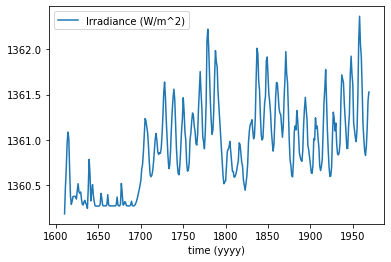

In [20]:
# pandas
data.plot()

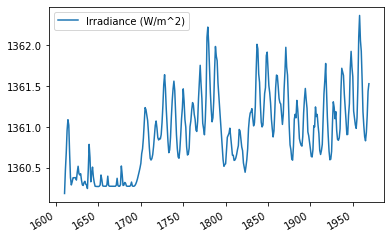

In [21]:
# matplotlib
%matplotlib inline
plt.plot(data.index, data['Irradiance (W/m^2)'], label='Irradiance (W/m^2)')
plt.gcf().autofmt_xdate()
plt.legend()

Some LaTiS datasets are solar spectral irradiance (SSI) datasets, like `uars_solstice_ssi`, which are 3D datasets with irradiance values that are a function of both time and wavelength. We can subset the data by both time and wavelength, and a convinient way to visualize them is with heatmaps:

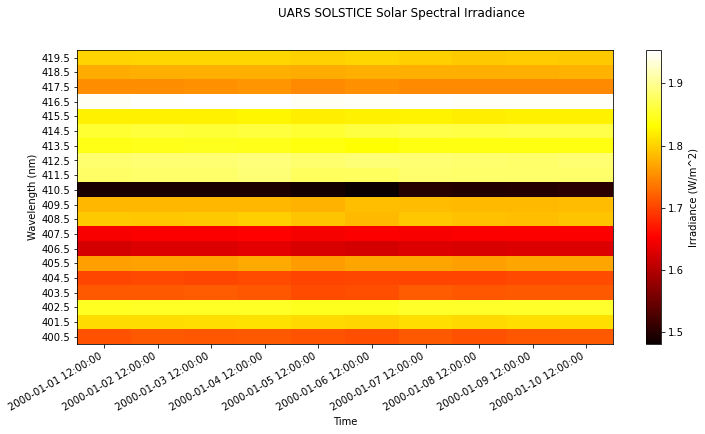

In [23]:
data = pd.read_csv(latis_query_url("uars_solstice_ssi", "csv", projections=["time,wavelength,irradiance"], min_time="2000-01-01", max_time="2000-01-11", operations=["select(wavelength>400)", "formatTime(yyyy-MM-dd'T'HH:mm:ss.SSS)"]), parse_dates=[0], index_col=[0])

xs = data.index.unique().tolist()  # unique time values
ys = data["wavelength (nm)"].unique().tolist()  # unique wavelength
irr = data["irradiance (W/m^2/nm)"].to_numpy().reshape(len(xs),len(ys))  # reshaped irradiance values

fig, ax = plt.subplots(figsize=(12, 6))
img = ax.imshow(irr.T, cmap='hot', interpolation='nearest', aspect='auto')
ax.xaxis.set_ticks(np.arange(0, len(xs), 1))
ax.yaxis.set_ticks(np.arange(0, len(ys), 1))
ax.set_xticklabels(xs)
ax.set_yticklabels(ys)
ax.invert_yaxis()
ax.set_xlabel("Time")
ax.set_ylabel("Wavelength (nm)")
fig.suptitle("UARS SOLSTICE Solar Spectral Irradiance")
cbar = fig.colorbar(img)
cbar.set_label("Irradiance (W/m^2)")
plt.gcf().autofmt_xdate()
plt.show()

This was an introduction to accessing and displaying datasets from the [LASP Interactive Solar Irradiance Data Center (LISIRD)](https://lasp.colorado.edu/lisird) using LaTiS with Python. Feel free to modify this notebook to play around with different datasets, time range selections, operations, etc. to see the results. Changes made to this notebook will not persist.